### Hoja de trabajo 05
##### Jose Daniel Gomez Cabrera 21429

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.naive_bayes import GaussianNB
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import root_mean_squared_error
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [101]:
train = pd.read_csv("train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [102]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Calcular los nulls para cada variable que posea nullls

In [103]:
nulls = train.isnull().sum()
nulls = nulls[nulls > 0]
nulls

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

##### Cambiar las variables categoricas a numericas y rellenar NAs con 0

In [104]:
for i in nulls.index:
  print(i)
  train = train.apply(pd.to_numeric, errors='coerce')
  train = train.fillna(0)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


##### Despues de esto, verificar los puntos atipicos en el dataset procesado

<Axes: >

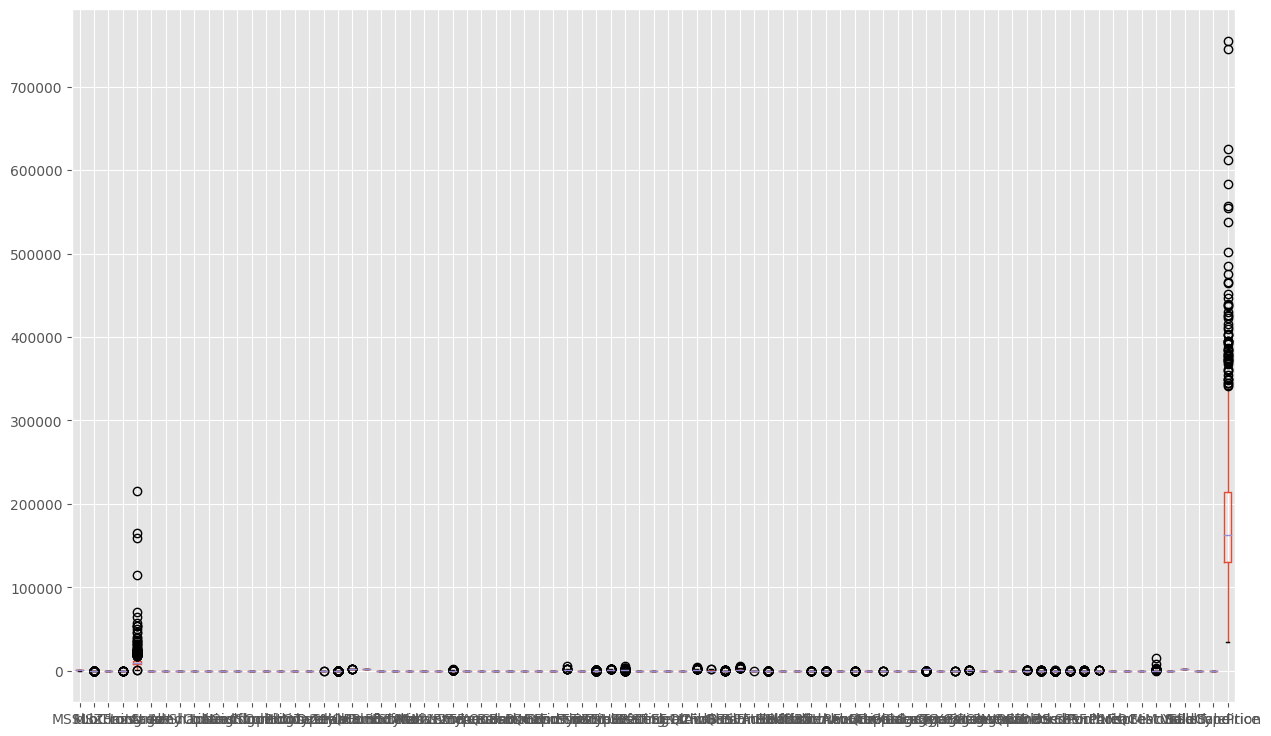

In [105]:
train.boxplot()

##### Encontramos las variables con puntos atipicos

<Axes: >

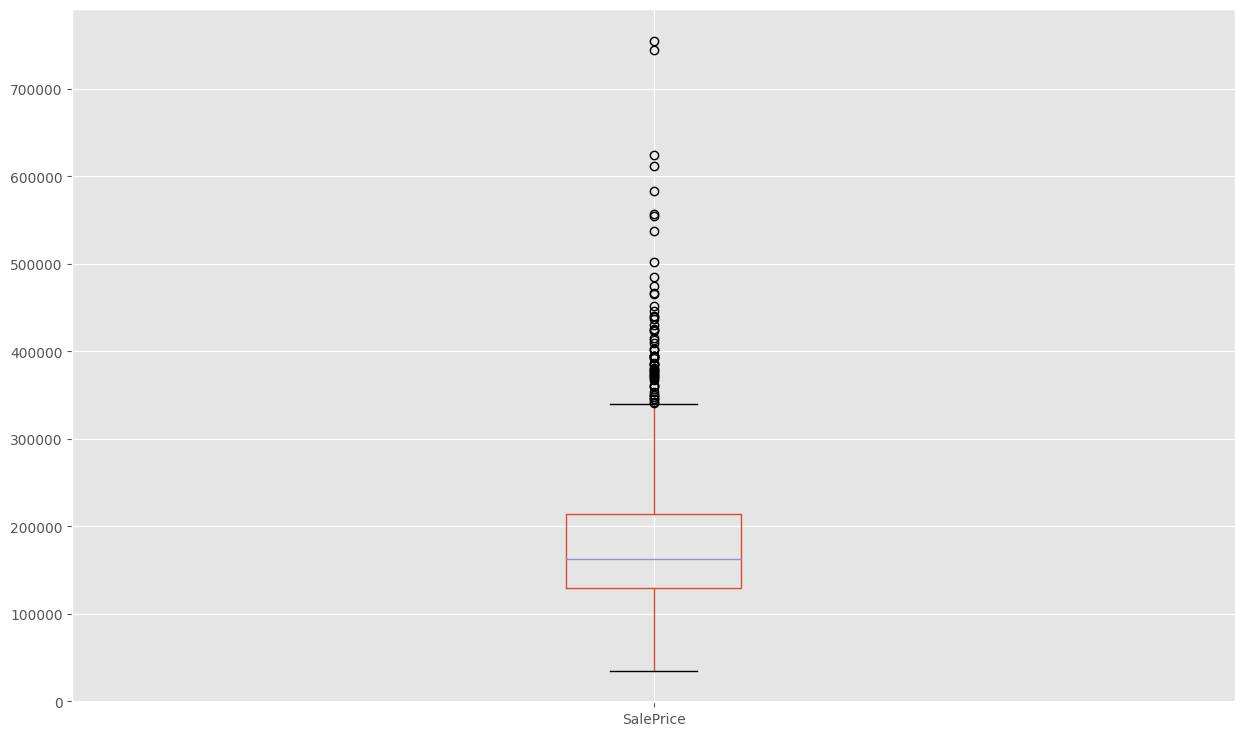

In [106]:
train[["SalePrice"]].boxplot()

<Axes: >

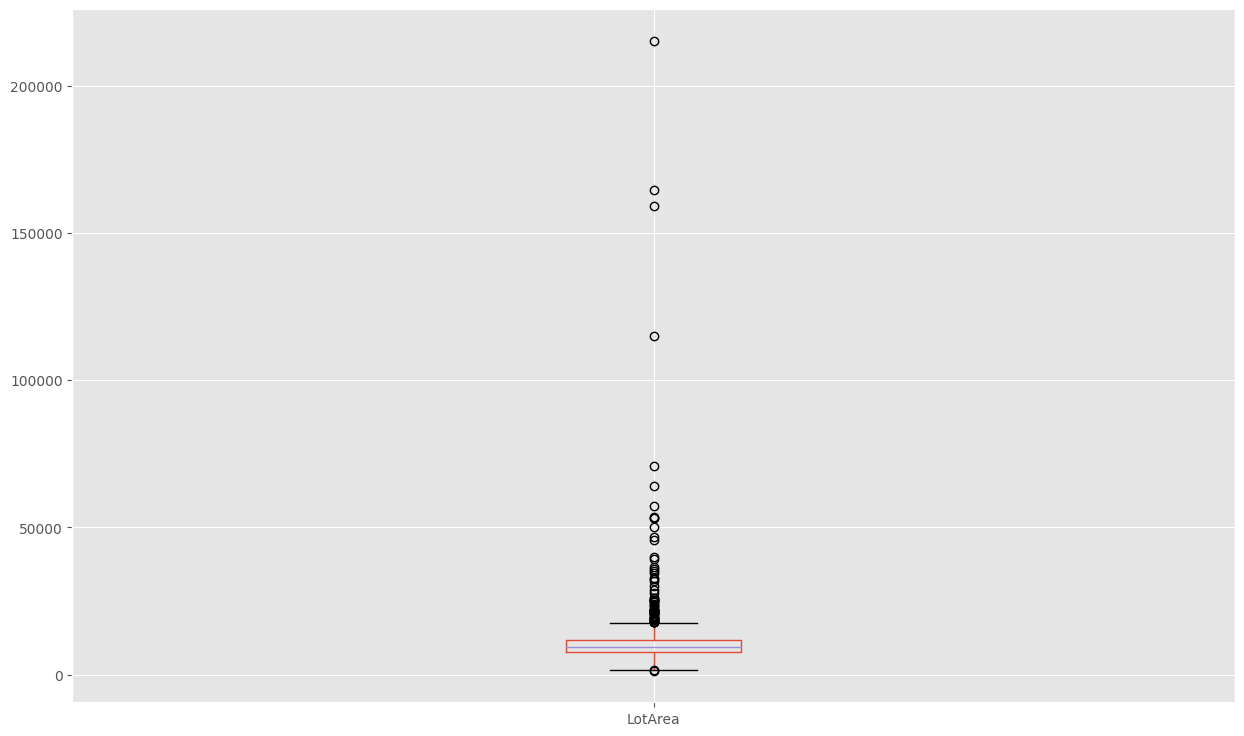

In [107]:
train[["LotArea"]].boxplot()

##### Removemos puntos atipicos

In [108]:
train = train[train["SalePrice"] < 700000]
train = train[train["LotArea"] < 100000]

##### Seleccionamos nuestras variables objetivo

In [109]:
# Define the target
y = train.pop('SalePrice')

# Remove the target from the current DataFrame
X = train
random.seed(1234)

##### Division de set de datos

In [110]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

##### Separacion de variables categoricas y numericas

In [119]:
numericals = selector(dtype_exclude=object)
categoricals = selector(dtype_include=object)

numericals = numericals(train)
categoricals = categoricals(train)

catPreprocessor = OneHotEncoder(handle_unknown="ignore")
numPreprocessor = StandardScaler()
preprocessor = ColumnTransformer([
  ('one-hot-encoder', catPreprocessor, categoricals),
  ('standar-scaler', numPreprocessor, numericals)
])

pipeline = Pipeline([
  ('preprocessor', preprocessor),
  ('regressor', GaussianNB())
])

pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('one-hot-encoder',
                                    OneHotEncoder(handle_unknown='ignore'), []),
                                   ('standar-scaler', StandardScaler(),
                                    ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage',
                                     'LotArea', 'Street', 'Alley', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'OverallQual', 'OverallCond', 'YearBuilt',
                                     'YearRemodAdd', 'RoofStyle', 'RoofMatl',
                                     'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                     'MasVnrArea', 'ExterQual', 'ExterCond',
                                 

##### Creacion y prediccion del modelo

In [112]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
min = y.min()
max = y.max()
std_dev = np.std(y)

print(f"Mínimo: {min}")
print(f"Máximo: {max}")
print(f"Desviación estándar: {std_dev}")
print(f"RMSE: {rmse}")

Mínimo: 34900
Máximo: 625000
Desviación estándar: 76434.20276151803
RMSE: 52206.30544040482


##### Crear otro modelo para validacion

In [113]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# obtener el valor de la raiz cuadrada y hacerlo positivo (porque cross_val_score devuelve valores negativos para MSE)
rmse_scores = np.sqrt(-scores)

print(f"RMSE Scores: {rmse_scores}")
print(f"RMSE Mean: {rmse_scores.mean()}",)
print(f"RMSE Standard Deviation: {rmse_scores.std()}")

RMSE Scores: [36342.95343099 33677.74386026 29005.18499569 25400.23498109
 23753.71896146]
RMSE Mean: 29635.96724589692
RMSE Standard Deviation: 4780.371969489561


In [125]:
X = train.drop(['SalePrice'], axis=1)

# Crear las etiquetas para cada modelo
y2 = train['SalePrice']

# Crear los modelos
model2 = LinearRegression()

# Realizar la validación cruzada 
scores2 = cross_val_score(model2, X, y2, cv=5, scoring='neg_mean_squared_error')

# Tomar la raíz cuadrada y hacer positivo (porque cross_val_score devuelve valores negativos para MSE)
rmse_scores2 = np.sqrt(-scores2)

# Imprimir los valores de RMSE
print("Validación Cruzada")
print("RMSE Scores for SalePrice:", rmse_scores2)
print("RMSE Mean for SalePrice:", rmse_scores2.mean())
print("RMSE Standard Deviation for SalePrice:", rmse_scores2.std())

Validación Cruzada
RMSE Scores for SalePrice: [28321.06184537 34657.70489394 36329.16205031 30107.55090271
 49438.16740812]
RMSE Mean for SalePrice: 35770.729420092204
RMSE Standard Deviation for SalePrice: 7428.575498014124


##### Clasificar las casas por categoria de precio

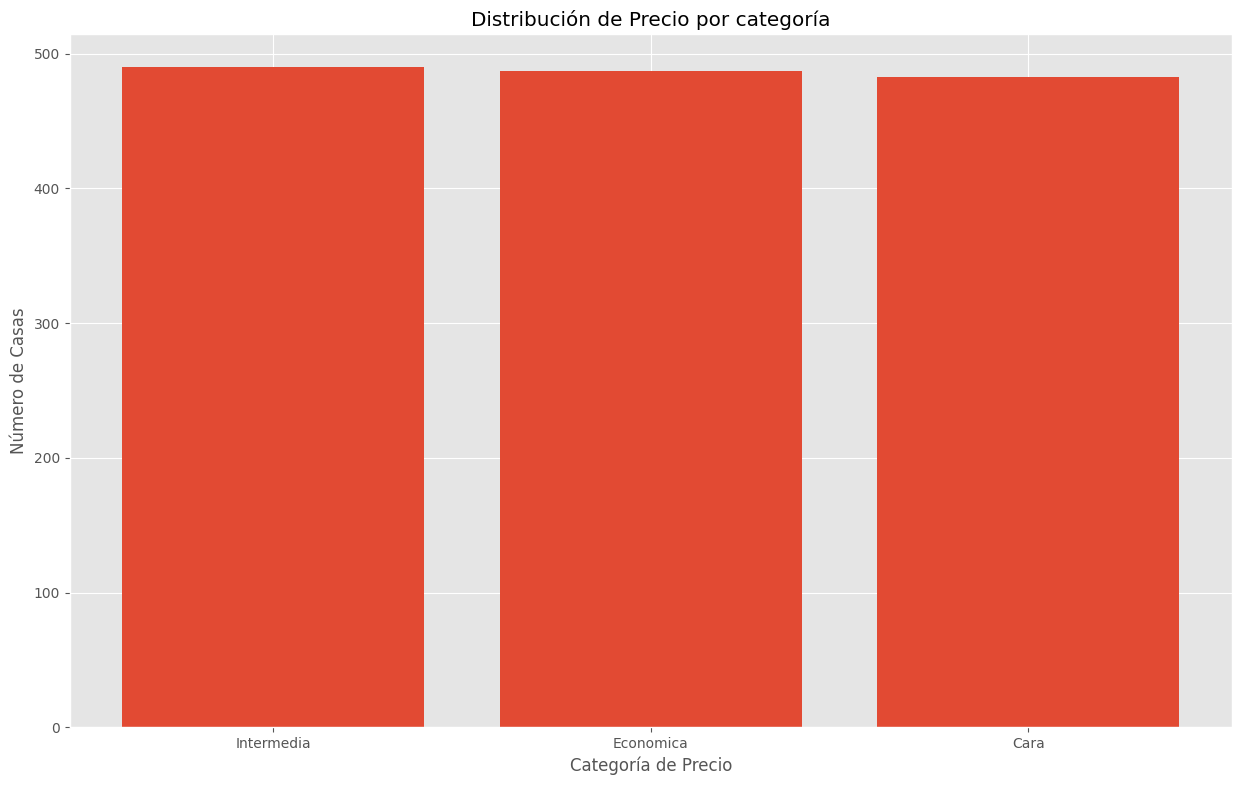

In [138]:
# volver a leer el archivo y quitarle los NAs porque anteriormente eliminamos la columna SalePrice
train = pd.read_csv('train.csv')

for i in nulls.index:
  train = train.apply(pd.to_numeric, errors='coerce')
  train = train.fillna(0)

categories = ['Economica', 'Intermedia', 'Cara']

# Crear la columna de categorías
train['PriceCategory'] = pd.qcut(train['SalePrice'], q=len(categories), labels=categories)

# Verificar la distribución de las categorías
plt.bar(train['PriceCategory'].value_counts().index, train['PriceCategory'].value_counts().values)
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Casas')
plt.title('Distribución de Precio por categoría')
plt.show()

#### Seleccionar variable objetivo, entrenar modelo y calcular matriz de confusion

Matriz de confusion por Naive Bayes
[[135   2  15]
 [  0 127  14]
 [ 11  50  84]]
Accuracy: 0.7899543378995434


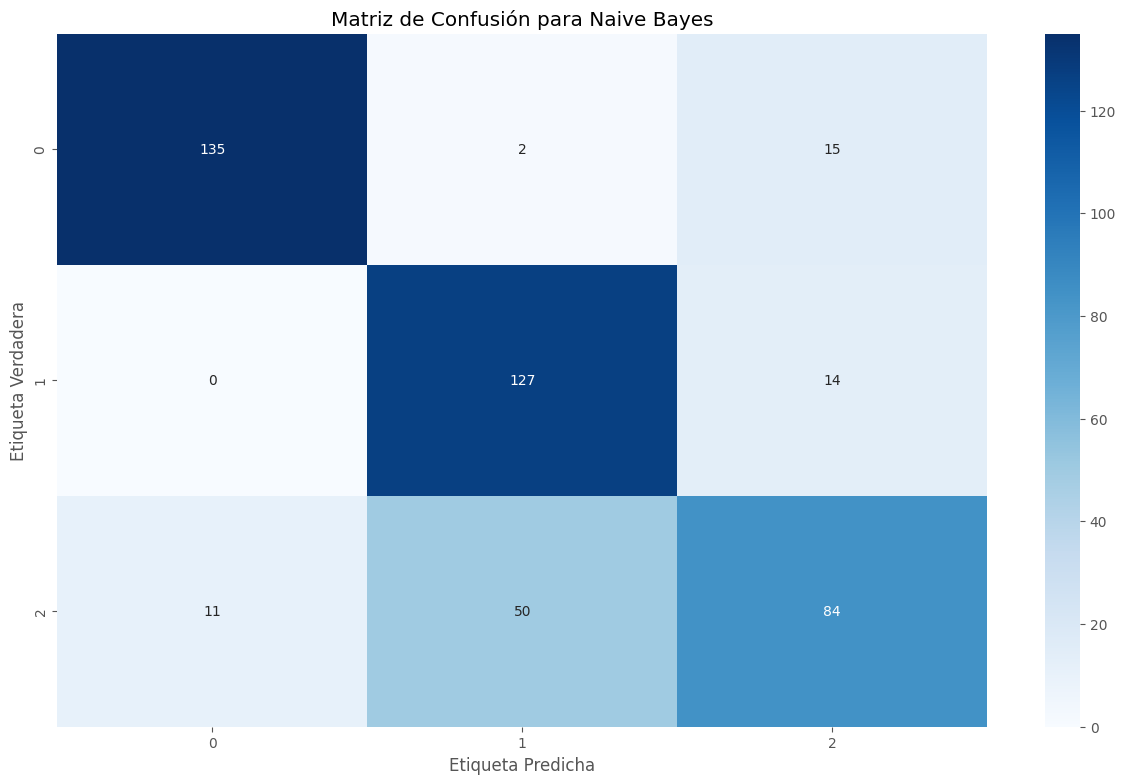

In [115]:
train['PriceCategory'] = pd.qcut(train['SalePrice'], q=len(categories), labels=categories)

# Seleccionar variable objetivo
y = train.pop('PriceCategory')
X = train
random.seed(1234)

# entrenar modelo
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

# Preprocesar datos
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
consfussionMatrix = confusion_matrix(y_test,y_pred)

# Calcular la matriz de confusión
consfussionMatrix = confusion_matrix(y_test, y_pred)

# calcular estadisticas de la matriz de confusion
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print(f'Matriz de confusion por Naive Bayes\n{consfussionMatrix}')
print(f'Accuracy: {accuracy}')

sns.heatmap(consfussionMatrix, annot=True, cmap="Blues", fmt="d")
plt.title('Matriz de Confusión para Naive Bayes')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

#### Cross validation para la prediccion

In [139]:
train['PriceCategory'] = pd.qcut(train['SalePrice'], q=len(categories), labels=categories)

train['PriceCategory'] = train['PriceCategory'].fillna(0)

# Seleccionar variable objetivo
y = train.pop('PriceCategory')
X = train
random.seed(1234)

gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

params =  [{
  "regressor__var_smoothing": np.logspace(0,-9, num=100)
}]
modelo = GridSearchCV(pipeline,param_grid=params,n_jobs=2, cv=5,scoring="neg_root_mean_squared_error")
modelo.fit(X_train,y_train)
modelo.best_params_

C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'regressor__var_smoothing': 1.0}

In [134]:
print(modelo.best_estimator_)
print('Best score:')
print(modelo.best_score_)
y_mejor_pred = modelo.best_estimator_.predict(X_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standar-scaler',
                                                  StandardScaler(),
                                                  ['Id', 'MSSubClass',
                                                   'MSZoning', 'LotFrontage',
                                                   'LotArea', 'Street', 'Alley',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyl